# Import the programs that are going to be used 

In [2]:
import pandas
import numpy as np
from pandas import plotting
from scipy import stats
from statsmodels.formula.api import ols
import seaborn
from matplotlib import pyplot as plt
import math

In [3]:
datafile = pandas.read_csv("brain_size.csv", sep = ";", na_values=".")

In [4]:
datafile

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


# Exercise
## What is the mean value for VIQ for the full population?

In [5]:
datafile['VIQ'].mean()

112.35

## How many males/females were included in this study?

In [6]:
groupby_gender = datafile.groupby('Gender')

In [7]:
groupby_gender.count()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,20,20,20,20,20,20,20
Male,20,20,20,20,18,19,20


## What is the average value of MRI counts expressed in log units, for males and females?

In [8]:
for gender, value in groupby_gender['MRI_Count']:
    print(gender, math.log10(value.mean()))

Female 5.935836942481715
Male 5.979937608508486


## Plot the scatter matrix for males only, and for females only. Do you think that the 2 sub-populations correspond to gender?

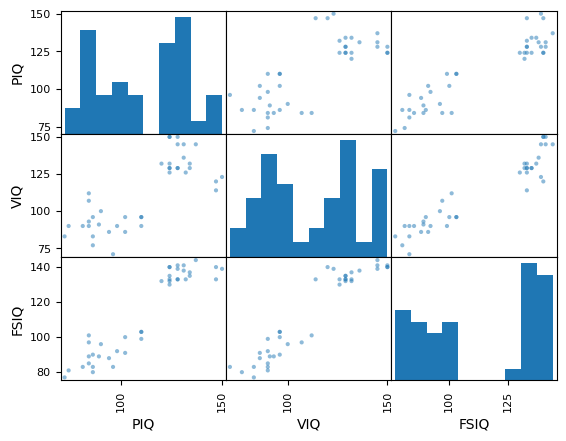

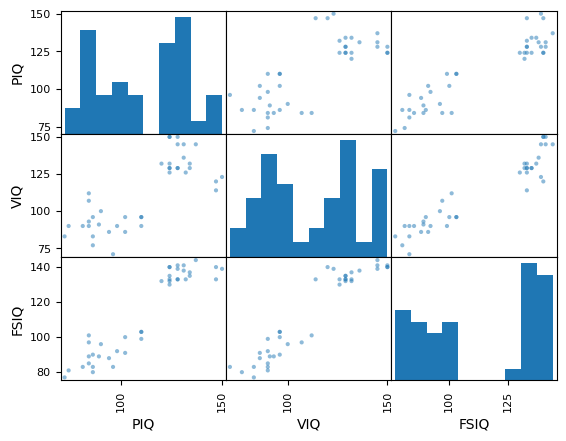

In [15]:
for gender, value in groupby_gender['Gender']:
    plotting.scatter_matrix(datafile[['PIQ', 'VIQ', 'FSIQ']]) 

### The subpopulation does not correspond to gender

## Test the difference between weights in males and females.

In [23]:
female_weight = datafile[datafile['Gender'] == 'Female']['Weight']
Male_weight = datafile[datafile['Gender'] == 'Male']['Weight']
stats.ttest_ind(female_weight, Male_weight)

TtestResult(statistic=nan, pvalue=nan, df=nan)

## Use non parametric statistics to test the difference between VIQ in males and females.

In [25]:
female_viq = datafile[datafile['Gender'] == 'Female']['VIQ']
Male_viq = datafile[datafile['Gender'] == 'Male']['VIQ']
stats.wilcoxon(female_viq, Male_viq)

WilcoxonResult(statistic=82.5, pvalue=0.40909767150878906)

# Linear models

In [26]:
x = np.linspace(-5, 5, 20)
np.random.seed(1)
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
data = pandas.DataFrame({'x': x, 'y': y})

In [27]:
model = ols("y ~ x", data).fit()

In [28]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           8.56e-08
Time:                        12:56:13   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

## Retrieve the estimated parameters from the model above.

In [30]:
print(model.params)

Intercept   -5.533459
x            2.936888
dtype: float64


# Multiple regression

In [10]:
mr_model = ols('MRI_Count ~ VIQ', datafile).fit()
mr_model = ols('Height ~ VIQ', datafile).fit()
mr_model = ols('Weight ~ VIQ', datafile).fit()

In [11]:
print(mr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.2096
Date:                Tue, 18 Jul 2023   Prob (F-statistic):              0.650
Time:                        14:59:29   Log-Likelihood:                -173.23
No. Observations:                  38   AIC:                             350.5
Df Residuals:                      36   BIC:                             353.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    159.7849     19.457      8.212      0.0

In [ ]:
print(model.f_test